In [1]:
import numpy as np

def getdiff(y):
    # Differentiate y to get gaussian beam
    if y[len(y)-1] < y[0]: y = y[::-1]
    ygauss = np.gradient(y)
    xgauss = np.arange(len(ygauss))
    return xgauss,ygauss

def gaussianfit(x,y,*p0):
    from scipy.optimize import curve_fit
    # Calculate Gaussian fit to y
    # Define Gaussian fit function
    def gauss(x, *p):
        A, mu, sigma, y0 = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2)) + y0
    # Get first attempt parameters
    A0 = np.max(y)
    mu0 = x[int(np.floor(len(x)/2))]
    sigma0 = abs(x[len(x)-1]-x[0])/4
    y0 = y[0]
    p0 = [A0, mu0, sigma0, y0]
    # Run fit
    coeff, var_matrix = curve_fit(gauss, x, y, p0=p0)
    yfit = gauss(x, *coeff)
    return coeff, yfit

def getprofile(y,mm = 1):
    # Calculate the gaussian beam profile from integrated razor blade power measurement
    # Differentiate 
    xgauss,ygauss = getdiff(y)
    xgauss = xgauss*mm
    coeff, yfit = gaussianfit(xgauss,ygauss)
    FWHM = coeff[2]*2.35
    print('Full-Width-Half-Max, FWHM = {0:.2f} mm'.format(FWHM))
    print('')
    print('A = {0:.2f}, x0 = {1:.2f} mm, sigma = {2:.2f} mm, y0 = {3:.2f}'.format(coeff[0], coeff[1], coeff[2], coeff[3]))
    print('A*exp(-(x-x0)^2/(2*sigma^2)) + y0')
    return xgauss, ygauss, yfit, coeff

def plotprofile(x,y,yfit):
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.plot(x, y,'d',label='Beam Profile')
    plt.plot(x, yfit, '--',label='Gaussian Fit')
    plt.xlabel('Width (mm)')
    plt.ylabel('Amplitude (arb)')
    plt.legend()
    plt.show()

Full-Width-Half-Max, FWHM = 5.66 mm

A = 0.18, x0 = 6.41 mm, sigma = 2.41 mm, y0 = -0.00
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


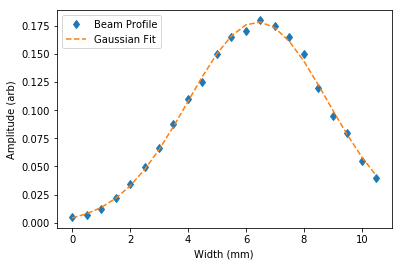

In [2]:
# 02/05/2018
# Measured after OPA B/S, before telescope; integrated power in W
ydata = np.array([2.05,2.01,1.94,1.85,1.75,1.61,1.45,1.28,1.10,0.92,0.76,0.59,0.46,0.34,0.24,0.165,0.108,0.066,0.039,0.023,0.014,0.009])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)

Full-Width-Half-Max, FWHM = 2.54 mm

A = 192.85, x0 = 2.83 mm, sigma = 1.08 mm, y0 = -3.47
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


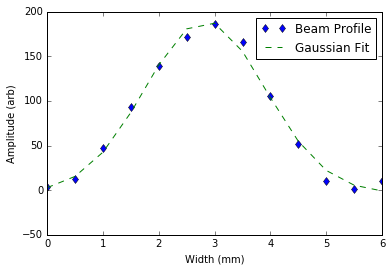

Beam ratio = 0.448267154449


In [10]:
# 02/08/2018
# Razor blade after telescope, after first B/S
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([990,980,988,960,885,750,553,377,211,98,25,4.5,0.5])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/2.41))

Full-Width-Half-Max, FWHM = 3.47 mm

A = 68.61, x0 = 5.11 mm, sigma = 1.48 mm, y0 = 22.75
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


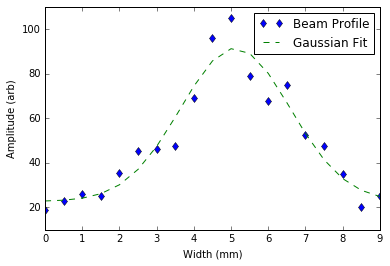

Beam ratio = 1.36792244326


In [9]:
# 02/08/2018
# Razor blade after THz/sampling B/S
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([58,77,104,129,154,200,245,292,340,430,532,640,690,775,840,880,935,950,975])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.08))

Full-Width-Half-Max, FWHM = 3.99 mm

A = 70.49, x0 = 6.03 mm, sigma = 1.70 mm, y0 = 17.68
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


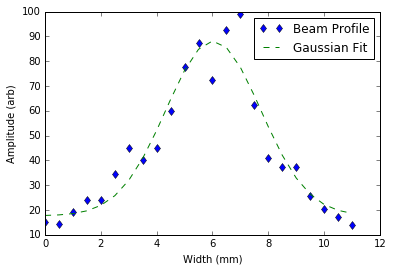

Beam ratio = 1.57090268073


In [3]:
# 02/09/2018
# Razor blade after THz/sampling B/S
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([1000,986,966,945,915,870,840,788,715,590,530,445,355,290,235,200,155,110,86,62,38,24,9])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.08))

Full-Width-Half-Max, FWHM = 1.46 mm

A = 123.35, x0 = 5.50 mm, sigma = 0.62 mm, y0 = 28.57
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


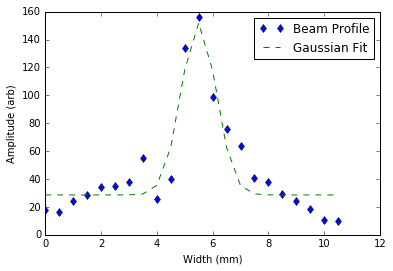

Beam ratio = 0.577105939093


In [4]:
# 02/09/2018
# Razor blade after THz/sampling B/S
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([10,28,43,77,100,145,170,220,280,272,360.420,540,672,737,823,865,905,940,963,989,1000,1010])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.08))

Full-Width-Half-Max, FWHM = 3.48 mm

A = 77.33, x0 = 5.84 mm, sigma = 1.48 mm, y0 = 19.00
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


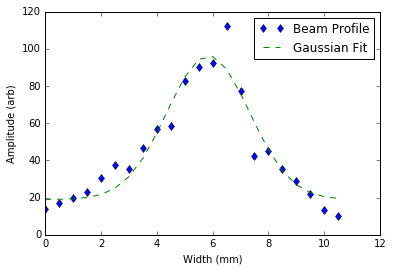

Beam ratio = 1.37147272309


In [5]:
# 02/09/2018
# Razor blade after THz/sampling B/S
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([990,980,963,936,905,865,815,780,660,555,475,375,310,258,196,165,125,90,64,44,24,10])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.08))

Full-Width-Half-Max, FWHM = 4.32 mm

A = 75.28, x0 = 6.00 mm, sigma = 1.84 mm, y0 = 13.01
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


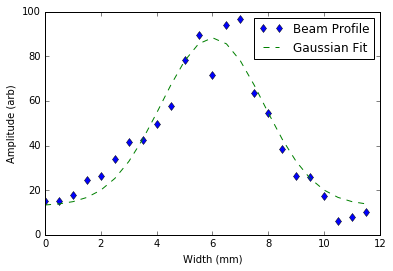

Beam ratio = 1.70066109549


In [12]:
# 02/09/2018
# Razor blade after THz/sampling B/S
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([8,23,38,59,87,112,155,195,240,294,355,451,534,594,722,787,849,896,926,949,978,984,990,1000])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.08))

Full-Width-Half-Max, FWHM = 3.23 mm

A = 77.23, x0 = 5.63 mm, sigma = 1.38 mm, y0 = 23.37
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


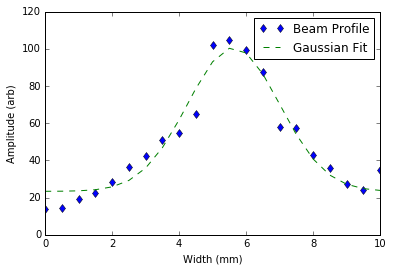

Beam ratio = 1.27457542863


In [15]:
# 02/09/2018
# Razor blade after THz/sampling B/S
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([1010,975,962,920,890,834,775,718,600,519,390,315,260,205,158,120,85,63,40,25,11])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.08))

Full-Width-Half-Max, FWHM = 3.24 mm

A = 83.70, x0 = 5.58 mm, sigma = 1.38 mm, y0 = 20.74
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


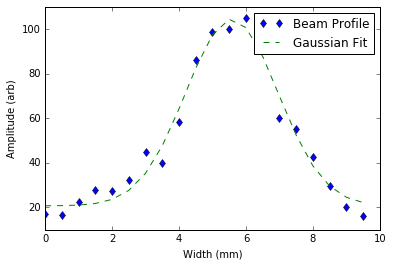

Beam ratio = 1.27645307929


In [4]:
# 02/09/2018
# Razor blade after THz/sampling B/S
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([9,26,42,71,98,126,163,216,243,333,415,530,615,740,800,860,910,945,969,985])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.08))

Full-Width-Half-Max, FWHM = 4.58 mm

A = 79.60, x0 = 4.51 mm, sigma = 1.95 mm, y0 = 10.55
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


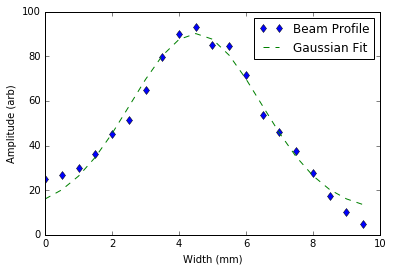

Beam ratio = 1.80336114941


In [3]:
# 02/12/2018
# Razor blade after THz/sampling B/S
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([995,990,975,955,920,880,828,773,685,604,515,418,335,259,205,156,115,84,55,30])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.08))

Full-Width-Half-Max, FWHM = 4.37 mm

A = 71.90, x0 = 5.41 mm, sigma = 1.86 mm, y0 = 15.59
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


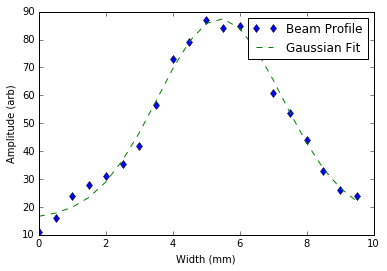

Beam ratio = 1.72156927598


In [6]:
# 02/12/2018
# Razor blade after THz/sampling B/S
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([4.8,15.9,37,64,93,126,164,210,277,356,435,530,603,700,765,822,872,910,938,962])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.08))

Full-Width-Half-Max, FWHM = 2.56 mm

A = 200.08, x0 = 3.05 mm, sigma = 1.09 mm, y0 = -8.80
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


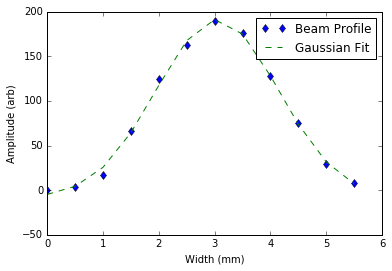

Beam ratio = 0.586762301158


In [9]:
# 02/12/2018
# Razor blade after telescope, 5.20 mm
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([977,969,918,818,663,465,283,139,35,6,0,0])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.86))

Full-Width-Half-Max, FWHM = 2.56 mm

A = 194.79, x0 = 3.18 mm, sigma = 1.09 mm, y0 = -7.77
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


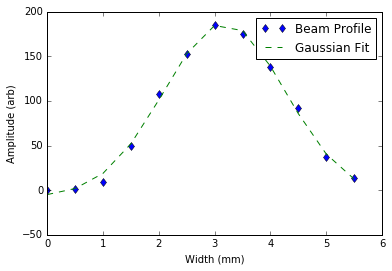

Beam ratio = 0.790637959275


In [14]:
# 02/12/2018
# Razor blade after telescope, 4.70 mm
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([0,0.4,3.4,19.6,103,235,408,605,758,881,941,955])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.38))

Full-Width-Half-Max, FWHM = 2.54 mm

A = 191.64, x0 = 3.15 mm, sigma = 1.08 mm, y0 = -7.17
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


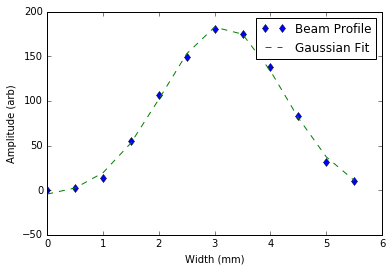

Beam ratio = 0.731410864284


In [15]:
# 02/12/2018
# Razor blade after telescope, 4.25 mm
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([940,930,878,764,603,414,242,116,29,5,0.7,0.1])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.48))

Full-Width-Half-Max, FWHM = 3.50 mm

A = 80.10, x0 = 4.94 mm, sigma = 1.49 mm, y0 = 17.44
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


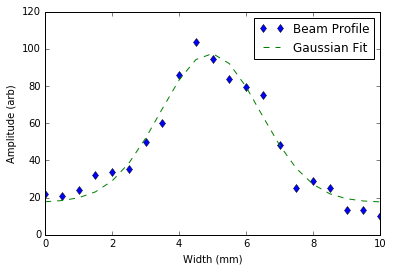

Beam ratio = 1.38095343723


In [16]:
# 02/12/2018
# Razor blade after THz/sampling B/S, 4.25 mm
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([967,957,940,930,890,872,840,775,690,616,522,427,315,255,195,155,124,88,60,40,18])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.08))

Full-Width-Half-Max, FWHM = 3.46 mm

A = 74.79, x0 = 5.40 mm, sigma = 1.47 mm, y0 = 19.52
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


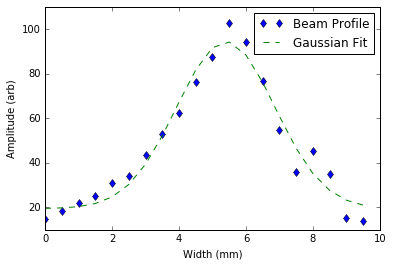

Beam ratio = 1.36329275853


In [21]:
# 02/12/2018
# Razor blade after THz/sampling B/S, 3.80 mm
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([17,32,54,76,104,138,172,225,278,350,430,525,635,713,788,822,860,913,930,944])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.08))

Full-Width-Half-Max, FWHM = 3.55 mm

A = 68.26, x0 = 5.18 mm, sigma = 1.51 mm, y0 = 20.63
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


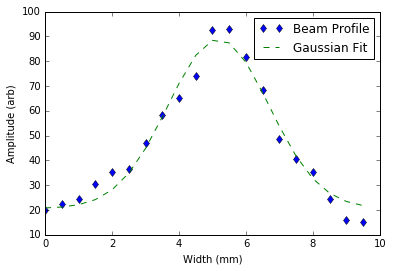

Beam ratio = 1.40030613672


In [25]:
# 02/12/2018
# Razor blade after THz/sampling B/S, 3.00 mm
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([930,915,898,866,827,785,730,648,567,462,382,314,252,197,158,124,87,63,38,18])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.08))

Full-Width-Half-Max, FWHM = 3.96 mm

A = 70.90, x0 = 5.64 mm, sigma = 1.69 mm, y0 = 12.93
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


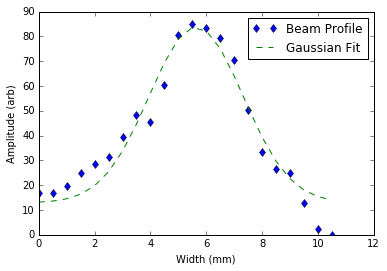

Beam ratio = 1.56021373382


In [45]:
# 02/12/2018
# Razor blade after THz/sampling B/S, 2.00 mm
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([16,33,50,72,100,129,163,208,260,299,381,460,551,627,710,768,811,835,864,885,890,890])
#ydata = np.array([260,299,381,460,551,627,710,768,811,835,864,885,890,890])
#ydata = np.array([16,33,50,72,100,129,163,208,260,299,381,460,551,627,710,768,811])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.08))

Full-Width-Half-Max, FWHM = 3.33 mm

A = 89.04, x0 = 4.46 mm, sigma = 1.42 mm, y0 = 17.20
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


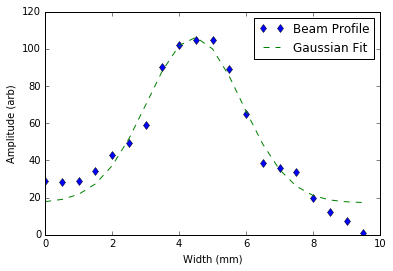

Beam ratio = 1.31370976982


In [46]:
# 02/12/2018
# Razor blade after THz/sampling B/S, 6.00 mm
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([997,996,982,972,942,905,870,828,740,650,530,440,326,260,208,161,122,92,64,35])
#ydata = np.array([942,905,870,828,740,650,530,440,326,260,208,161,122,92,64,35])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.08))

Full-Width-Half-Max, FWHM = 3.49 mm

A = 80.83, x0 = 5.64 mm, sigma = 1.48 mm, y0 = 19.61
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


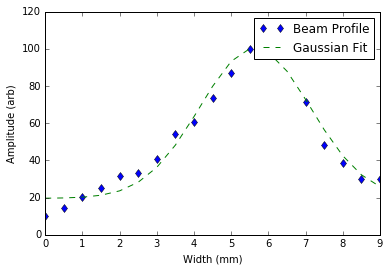

Beam ratio = 1.37499852663


In [13]:
# 02/13/2018
# Razor blade after THz/sampling B/S, 6.00 mm
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([955,925,895,848,798,705,605,495,405,321,258,200,150,119,84,56,34,15,5])
#ydata = np.array([955,925,895,848,798,705,605,495,405])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.08))

Full-Width-Half-Max, FWHM = 2.50 mm

A = 202.49, x0 = 2.07 mm, sigma = 1.07 mm, y0 = -5.97
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


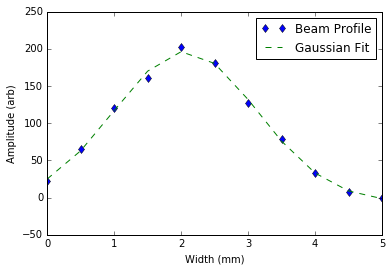

Beam ratio = 1.02257969883


In [12]:
# 02/13/2018
# Razor blade after OPA B/S, 6.00 mm
# Power meter located before THz pump entry to THz box; integrated power in mW
ydata = np.array([6.6,29,138,270,460,675,822,930,980,995,995])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(1.09/coeff[2]))

Full-Width-Half-Max, FWHM = 2.43 mm

A = 5.36, x0 = 3.38 mm, sigma = 1.03 mm, y0 = 0.69
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


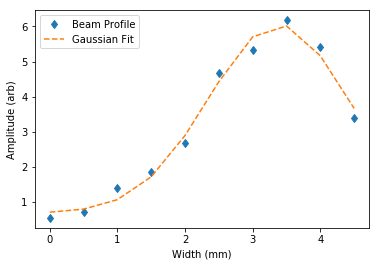

In [3]:
# 05/02/2018
# Razor blade of DFG after THz box
# Power meter located before ZnSe focusing lens; integrated power in mW
ydata = np.array([0.3,0.85,1.72,3.64,5.42,9.0,14.75,19.67,27.1,30.5,31.5])
ydata = np.array([0.3,0.85,1.72,3.64,5.42,9.0,14.75,19.67,27.1,30.5])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)

Full-Width-Half-Max, FWHM = 1.31 mm

A = 26.19, x0 = 2.73 mm, sigma = 0.56 mm, y0 = 0.37
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


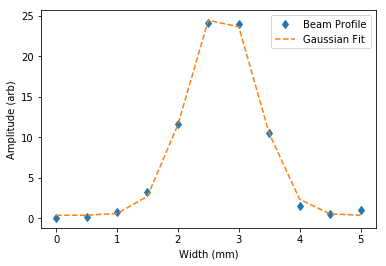

In [7]:
# 11/30/2018
# Razor blade of DFG after THz box
# Power meter located after 2 pinholes, outside THz box; integrated power in mW
ydata = np.array([77,76,76,73,55,25,6.8,1.7,0.3,0.08,0.03])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.5)
plotprofile(xgauss,ygauss,yfit)

Full-Width-Half-Max, FWHM = 1.22 mm

A = 14.40, x0 = 2.80 mm, sigma = 0.52 mm, y0 = 0.23
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


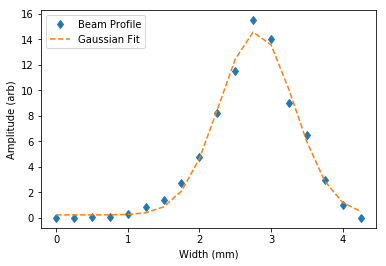

In [9]:
# 11/30/2018
# Razor blade of DFG after THz box
# Power meter located after 2 pinholes, outside THz box; integrated power in mW
ydata = np.array([0.03,0.05,0.08,0.13,0.3,0.7,2,3.5,7.5,13,24,36,55,64,73,77,79,79])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)

Full-Width-Half-Max, FWHM = 2.06 mm

A = 84.55, x0 = 2.60 mm, sigma = 0.87 mm, y0 = -3.45
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


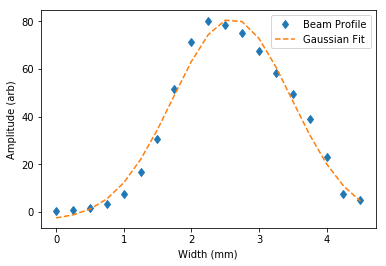

In [10]:
# 12/11/2018
# Diverging telescope lens position 6 mm
# Razor blade after 200 nm B/S
# Power meter located before THz/sampling B/S; integrated power in mW
ydata = np.array([665,660,650,614,572,515,455,380,305,223,145,80,42,19,8.3,4.1,1.8,0.74,0.15])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)
#print('Beam ratio = %s' % str(1.09/coeff[2]))

Full-Width-Half-Max, FWHM = 5.21 mm

A = 32.08, x0 = 4.03 mm, sigma = 2.22 mm, y0 = -0.22
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


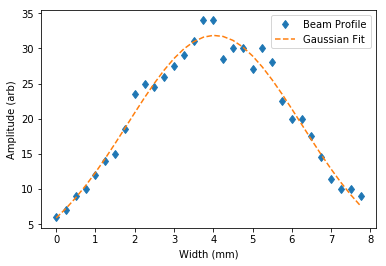

Beam ratio = 0.3926128993647863


In [13]:
# 12/11/2018
# Diverging telescope lens position 6 mm
# Razor blade before THz/sampling B/S
# Power meter located before THz/sampling B/S; integrated power in mW
ydata = np.array([658,649,638,629,615,600,580,560,540,515,484,455,430,395,370,338,302,270,240,212,185,160,136,\
                  110,89,73,59,45,35,25,17,11])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(0.87/coeff[2]))

Full-Width-Half-Max, FWHM = 4.39 mm

A = 36.14, x0 = 3.54 mm, sigma = 1.87 mm, y0 = 2.11
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


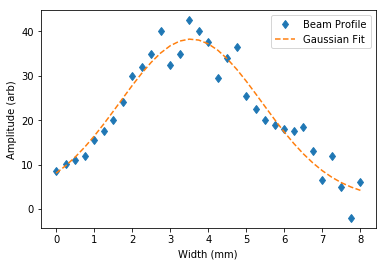

In [15]:
# 12/11/2018
# Diverging telescope lens position 8 mm
# Razor blade before THz/sampling B/S
# Power meter located before THz/sampling B/S; integrated power in mW
ydata = np.array([736,730,740,720,716,707,690,670,655,634,617,594,572,543,499,475,440,400,360,315,290,250,210,\
                  180,146,120,98,80,63,49,39,27,18.5])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)
#print('Beam ratio = %s' % str(0.87/coeff[2]))

Full-Width-Half-Max, FWHM = 2.36 mm

A = 91.78, x0 = 2.25 mm, sigma = 1.01 mm, y0 = -9.56
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


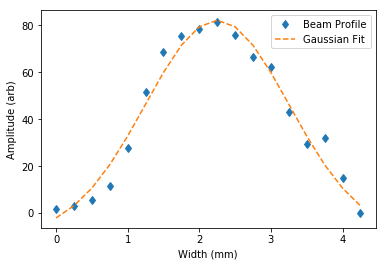

Beam ratio = 0.5379932719197064


In [21]:
# 12/11/2018
# Diverging telescope lens position 8 mm
# Razor blade after 200 nm B/S
# Power meter located before THz/sampling B/S; integrated power in mW
ydata = np.array([730,730,700,666,641,580,516,447,364,284,207,133,70,30,14.4,7,3,1.3])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.87))

Full-Width-Half-Max, FWHM = 2.34 mm

A = 98.18, x0 = 2.25 mm, sigma = 1.00 mm, y0 = -8.76
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


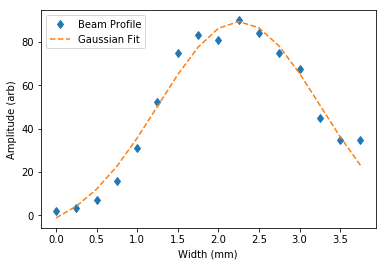

In [17]:
# 12/11/2018
# Diverging telescope lens position 10 mm
# Razor blade after 200 nm B/S
# Power meter located before THz/sampling B/S; integrated power in mW
ydata = np.array([765,730,695,640,560,490,392,310,230,144,80,39,17.7,7.7,3.1,1.1])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)
#print('Beam ratio = %s' % str(1.87/coeff[2]))

Full-Width-Half-Max, FWHM = 4.31 mm

A = 44.70, x0 = 4.23 mm, sigma = 1.83 mm, y0 = -1.50
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


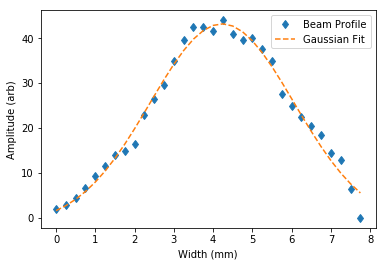

Beam ratio = 0.5454679946187383


In [20]:
# 12/11/2018
# Diverging telescope lens position 10 mm
# Razor blade before THz/sampling B/S
# Power meter located before THz/sampling B/S; integrated power in mW
#ydata = np.array([722,692,662,631,600,565,533,498,460,419,370,322,285,240,201,173,137,112,93,70,58,46,30,21,\
#                  13,7.7,3.8,1.6])
ydata = np.array([1.7,3.7,7.6,12.5,21,31,44,59,74,92,120,145,179,215,258,300,343,383,431,465,510,545,585,615,\
                 640,665,685,706,722,735,748,748])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(1.00/coeff[2]))

Full-Width-Half-Max, FWHM = 3.25 mm

A = 46.51, x0 = 3.81 mm, sigma = 1.38 mm, y0 = 5.85
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


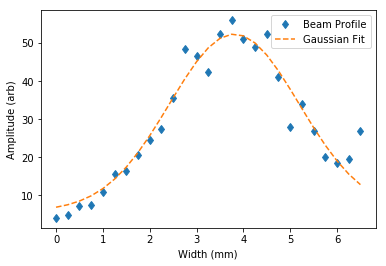

In [23]:
# 12/11/2018
# Diverging telescope lens position 12 mm
# Razor blade before THz/sampling B/S
# Power meter located before THz/sampling B/S; integrated power in mW
ydata = np.array([779,752,740,715,700,661,632,605,550,500,452,398,340,293,255,200,158,129,103,80,62,47,31,25,\
                  16,10.3,6.2])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)
#print('Beam ratio = %s' % str(1.00/coeff[2]))

Full-Width-Half-Max, FWHM = 2.36 mm

A = 94.36, x0 = 2.06 mm, sigma = 1.00 mm, y0 = -6.34
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


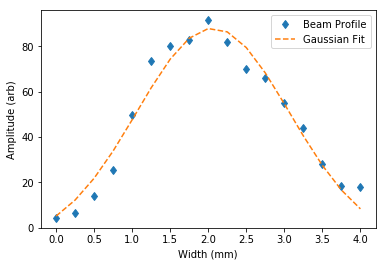

Beam ratio = 0.7274253037028211


In [24]:
# 12/11/2018
# Diverging telescope lens position 12 mm
# Razor blade after 200 nm B/S
# Power meter located before THz/sampling B/S; integrated power in mW
ydata = np.array([802,784,765,728,677,618,545,478,381,295,215,135,68,36,17,8,3.7])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(coeff[2]/1.38))

Full-Width-Half-Max, FWHM = 2.34 mm

A = 104.48, x0 = 2.25 mm, sigma = 1.00 mm, y0 = -8.67
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


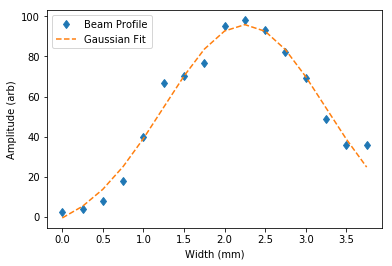

In [25]:
# 12/11/2018
# Diverging telescope lens position 14 mm
# Razor blade after 200 nm B/S
# Power meter located before THz/sampling B/S; integrated power in mW
ydata = np.array([826,790,754,692,616,528,430,332,240,179,100,45,20.4,9,3.9,1.4])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)
#print('Beam ratio = %s' % str(coeff[2]/1.38))

Full-Width-Half-Max, FWHM = 2.84 mm

A = 60.48, x0 = 3.88 mm, sigma = 1.21 mm, y0 = 3.32
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


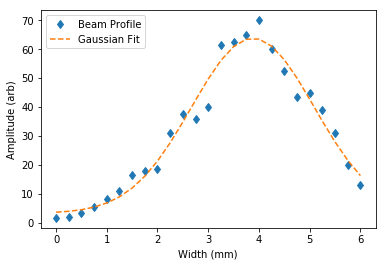

Beam ratio = 0.8273079126223107


In [26]:
# 12/11/2018
# Diverging telescope lens position 14 mm
# Razor blade before THz/sampling B/S
# Power meter located before THz/sampling B/S; integrated power in mW
ydata = np.array([790,777,750,715,672,625,585,520,465,380,335,255,212,175,140,100,78,63,42,30,20,13.3,8.8,\
                  6.4,4.7])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(1.00/coeff[2]))

Full-Width-Half-Max, FWHM = 2.09 mm

A = 15.25, x0 = 2.90 mm, sigma = 0.89 mm, y0 = 5.41
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


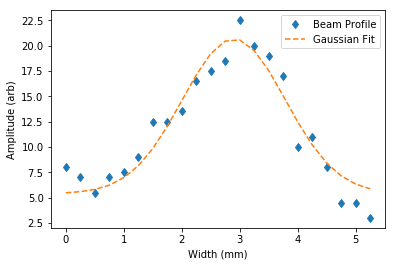

Beam ratio = 1.124913988426008


In [2]:
# 12/11/2018
# Diverging telescope lens position 14 mm
# Razor blade in THz box (@ telescope position, telescope removed)
# Power meter located before last mirror to generation ZnTe
ydata = np.array([278,275,269,266,253,244,233,210,195,170,150,133,115,100,88,75,63,57,48,43,37,29])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(1.00/coeff[2]))

Full-Width-Half-Max, FWHM = 1.89 mm

A = 13.75, x0 = 2.54 mm, sigma = 0.80 mm, y0 = 6.23
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


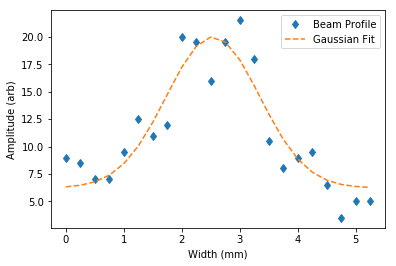

Beam ratio = 1.2430216679181807


In [3]:
# 12/11/2018
# Diverging telescope lens position 13 mm
# Razor blade in THz box (@ telescope position, telescope removed)
# Power meter located before last mirror to generation ZnTe
ydata = np.array([36,45,53,59,67,78,92,100,116,140,155,172,194,215,230,236,246,254,265,267,272,277])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(1.00/coeff[2]))

Full-Width-Half-Max, FWHM = 2.59 mm

A = 16.19, x0 = 3.79 mm, sigma = 1.10 mm, y0 = 3.34
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


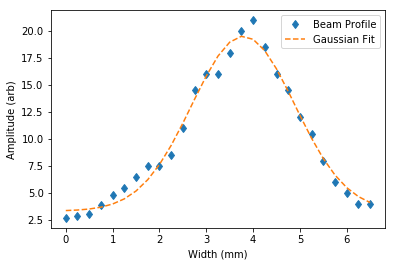

In [3]:
# Beam was probably aberated--going from hotdog to hamburger and back
# Adjusted beam path thru telescope and angle of converging lens

# 12/12/2018
# Diverging telescope lens position 13 mm
# Razor blade in THz box (@ telescope position, telescope removed)
# Power meter located before last mirror to generation ZnTe
ydata = np.array([267,263,259,253,247,237,226,213,197,181,160,139,120,103,88,71,59,49,42,34,27,21,16,11.4,\
                  8.2,5.2,2.5])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)
#print('Beam ratio = %s' % str(1.00/coeff[2]))

Full-Width-Half-Max, FWHM = 2.20 mm

A = 18.57, x0 = 2.95 mm, sigma = 0.94 mm, y0 = 4.55
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


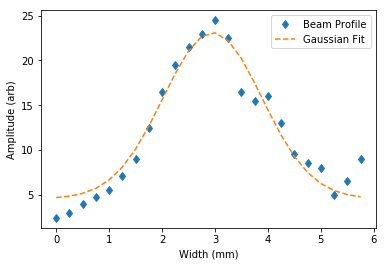

Beam ratio = 1.1763454986921371


In [6]:
# 12/12/2018
# Diverging telescope lens position 13 mm
# Razor blade before THz/sampling B/S
# Power meter located before last mirror to generation ZnTe
#ydata = np.array([255,248,232,217,191,171,155,137,113,91,72,55,41,31,25,18,13,8.5,5,2.7])
ydata = np.array([2.6,5,8.5,12.9,18,24,32.2,42,57,75,96,118,142,167,187,200,218,232,244,251,261,267,271,280])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(1.10/coeff[2]))

Full-Width-Half-Max, FWHM = 2.39 mm

A = 35.14, x0 = 2.29 mm, sigma = 1.02 mm, y0 = -3.34
A*exp(-(x-x0)^2/(2*sigma^2)) + y0


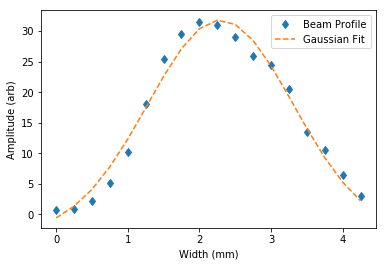

Beam ratio = 1.0802510317922664


In [11]:
# 12/12/2018
# Diverging telescope lens position 13 mm
# Razor blade after 200 nm B/S
# Power meter located before last mirror to generation ZnTe
ydata = np.array([287,284,274,263,247,222,198,170,140,108,77,49,26,12.7,5.7,2.4,1.15,0.46])
xgauss, ygauss, yfit, coeff = getprofile(ydata,0.25)
plotprofile(xgauss,ygauss,yfit)
print('Beam ratio = %s' % str(1.10/coeff[2]))